# **POWER TRANSFORMER**

- A power transform is a data transformation technique used in machine learning to make numerical features more normally distributed (Gaussian-like).

- Making data more normal helps many ML models that implicitly assume normality (like linear regression, logistic regression, Gaussian Naive Bayes, etc.).

- It reduces skewness, stabilizes variance, and makes feature distributions more symmetric

| Method          | Input Data                 | Notes                                                                         |
| --------------- | -------------------------- | ----------------------------------------------------------------------------- |
| **Box-Cox**     | Only positive values       | Classic power transform, can’t handle zero/negative data.                     |
| **Yeo-Johnson** | Positive & negative values | More flexible; covers most real datasets.                                     |


##  Box-Cox Transformation

For λ ≠ 0:

$$
y(\lambda) = \frac{x^{\lambda} - 1}{\lambda}
$$

For λ = 0:

$$
y(\lambda) = \log(x)
$$

**Notes:**

- If λ ≈ 0 → behaves like log transform  
- If λ ≈ 1 → almost no change  
- If λ < 1 → reduces right skewness  
- If λ > 1 → reduces left skewness  


##  Yeo-Johnson Transformation

For x ≥ 0:

$$
y = \frac{(x + 1)^{\lambda} - 1}{\lambda}
$$

For x < 0:

$$
y = \frac{- \left[ (-x + 1)^{2 - \lambda} - 1 \right]}{2 - \lambda}
$$

**Important:**

- Works with positive, zero, and negative values  
- More flexible than Box-Cox  


In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [35]:
df = pd.read_csv('concrete_data.csv')

In [36]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [37]:
df.shape

(1030, 9)

In [38]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [39]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [40]:
X=df.drop(columns=['Strength'])
y=df.iloc[:,-1]

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314848

In [43]:
meanScore=np.mean(cross_val_score(lr,X,y,scoring='r2'))
print(meanScore)

0.4609940491662864


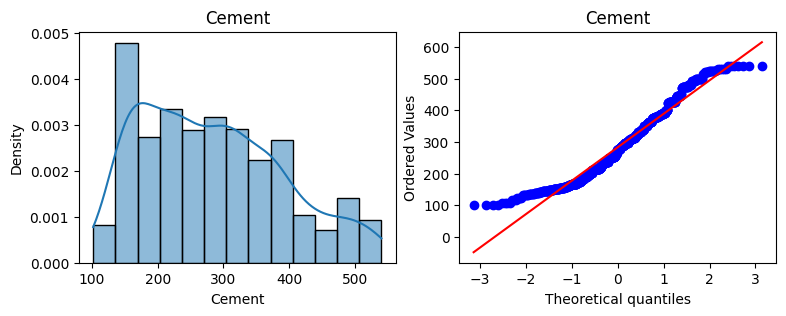

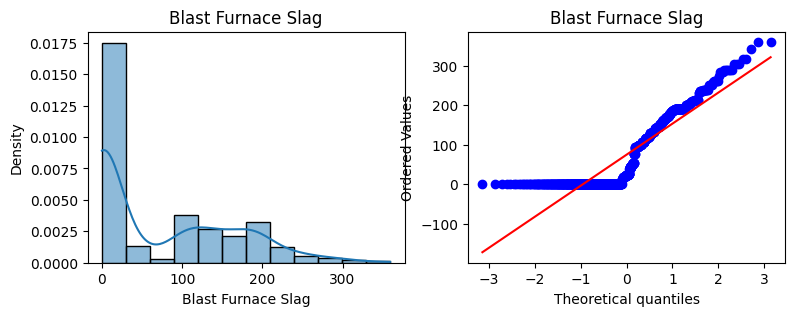

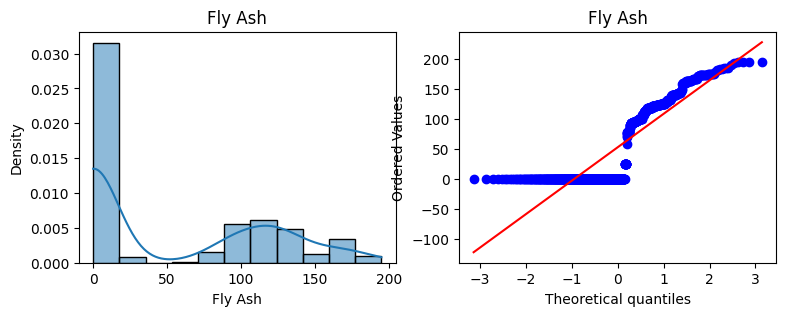

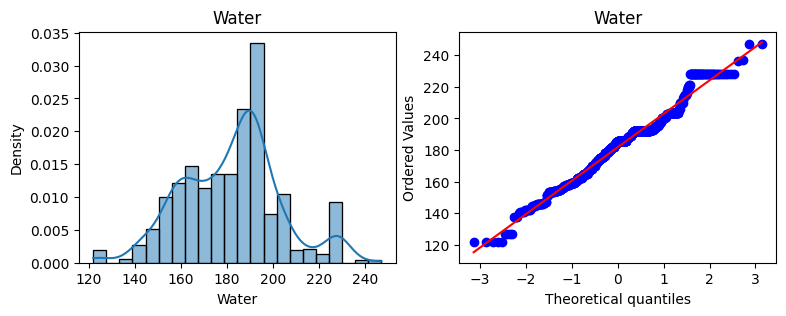

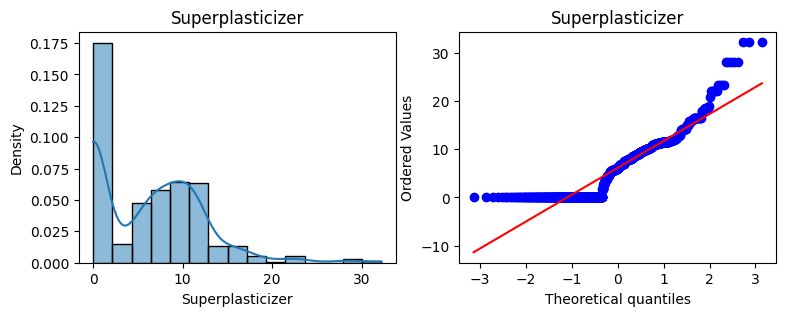

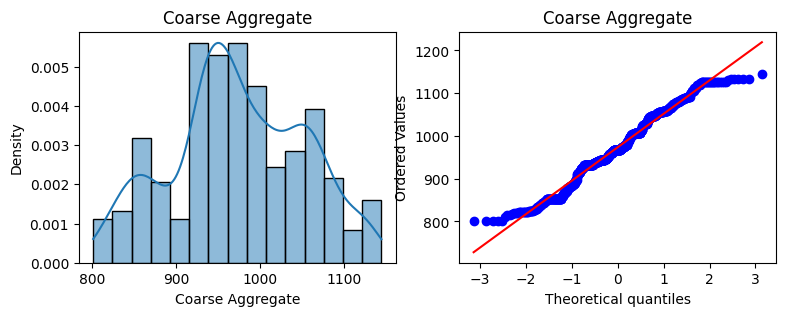

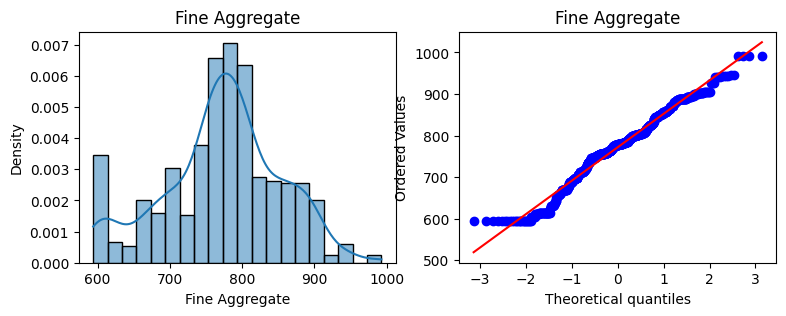

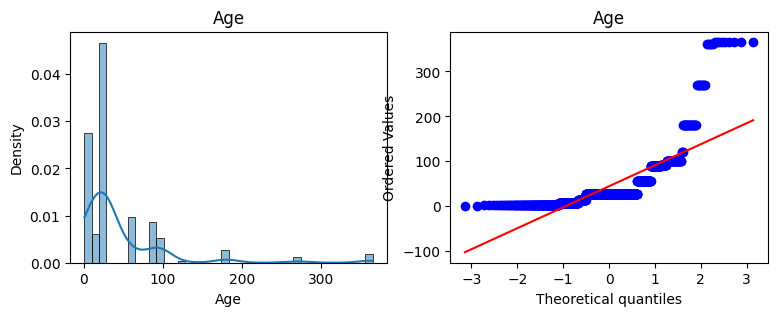

In [44]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(9,3))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True, stat="density")
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [45]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001) #Box-Cox cannot handle zero values.So we added very small value to the data.
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

| Lambda | Meaning              |
| ------ | -------------------- |
| λ = 1  | No transformation    |
| λ = 0  | Log transform        |
| λ < 1  | Reduces skewness     |
| λ > 1  | Expands distribution |

Example:

- Fly Ash = -0.038 → almost log transform

- Fine Aggregate = 1.78 → slight expansion

In [46]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825008078886

In [47]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.6658537941434357)

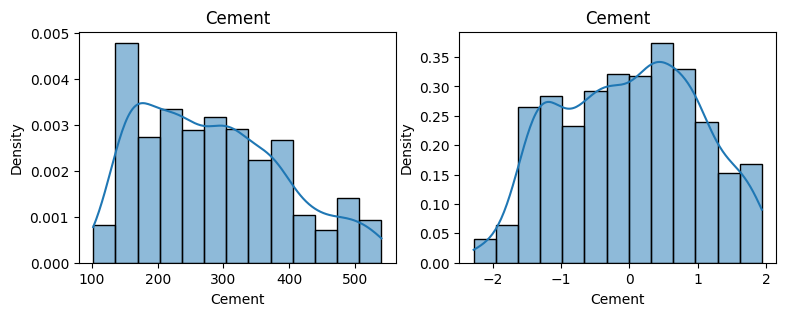

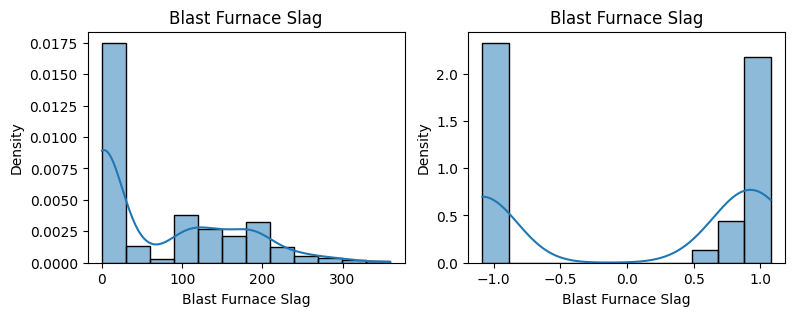

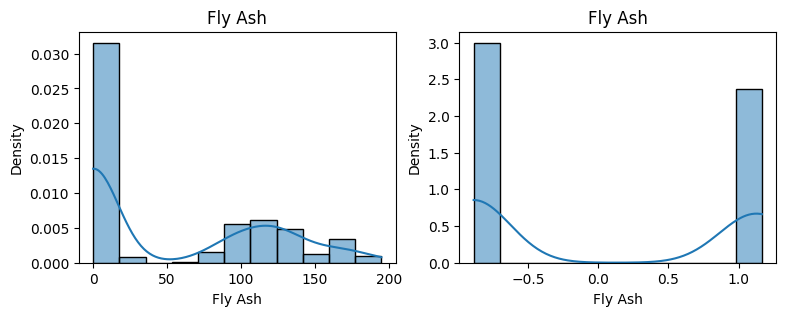

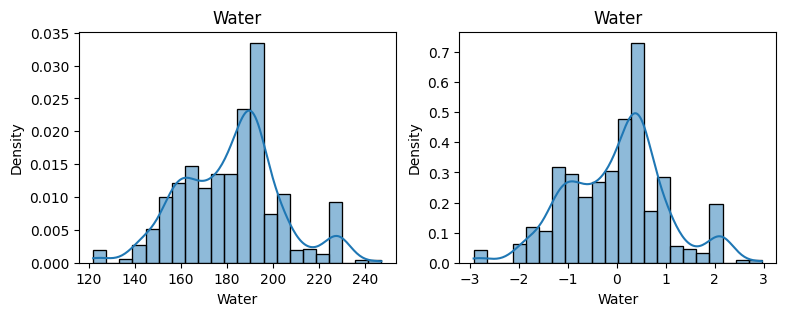

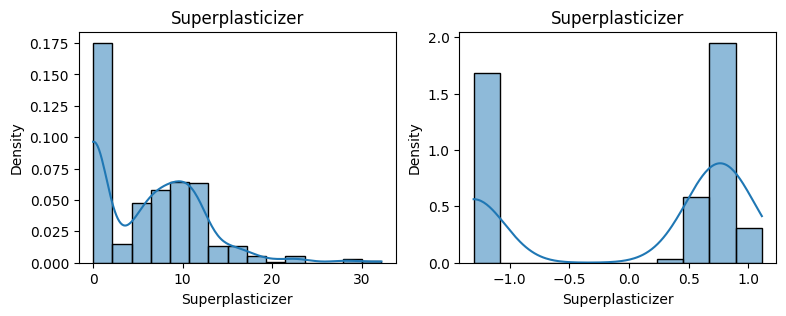

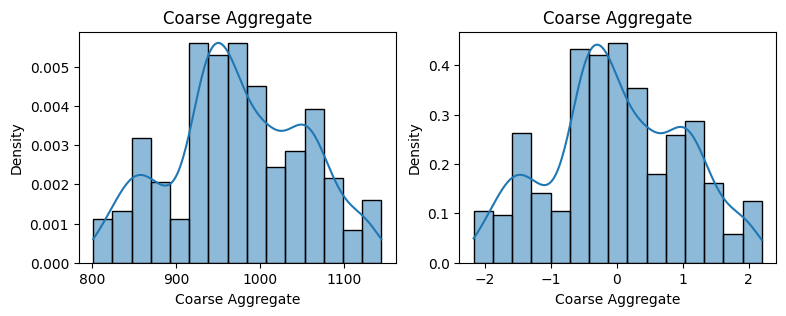

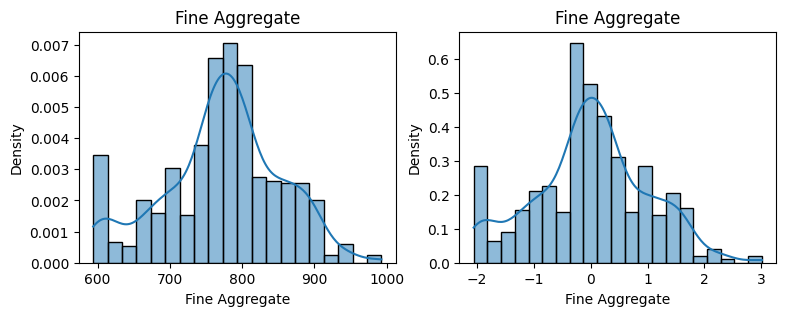

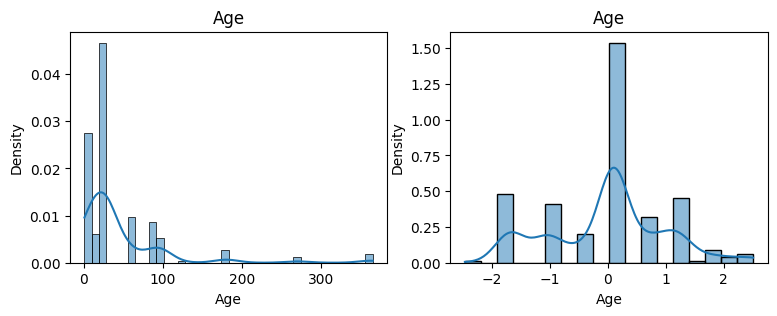

In [48]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(9,3))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True,stat='density')
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col],kde=True,stat='density')
    plt.title(col)

    plt.show()

In [49]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906511066099


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [50]:
X_transformed2 = pt1.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

np.float64(0.6834625126992433)

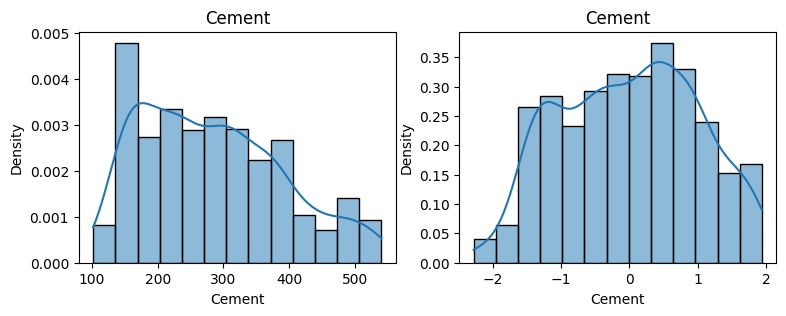

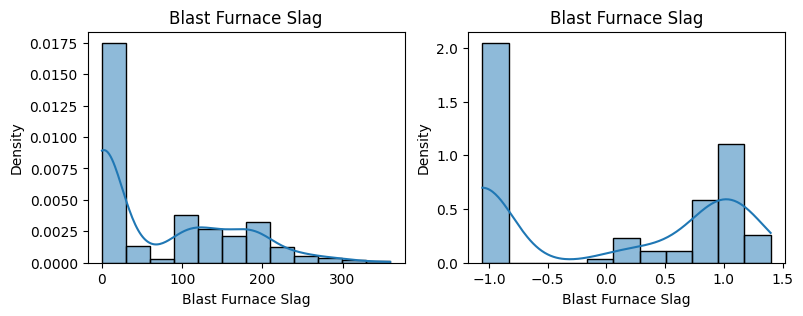

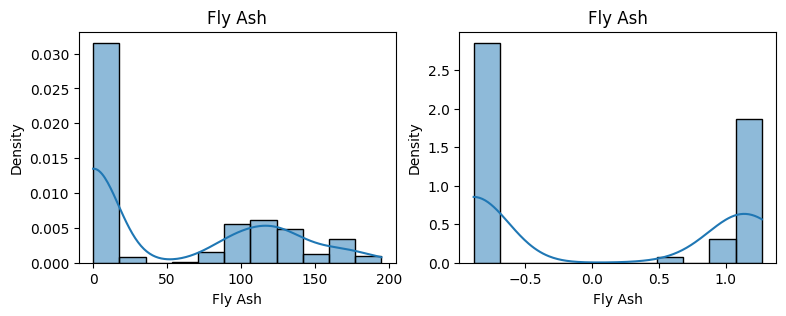

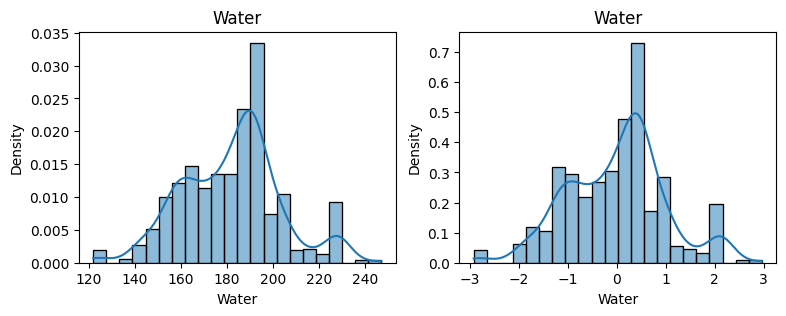

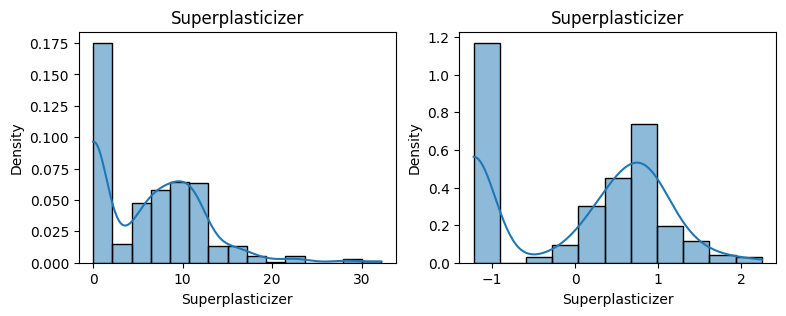

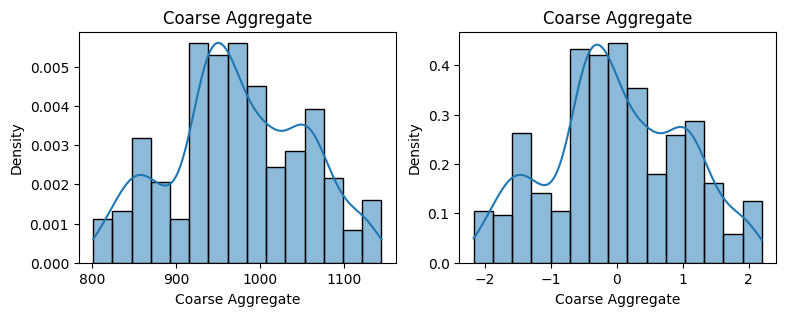

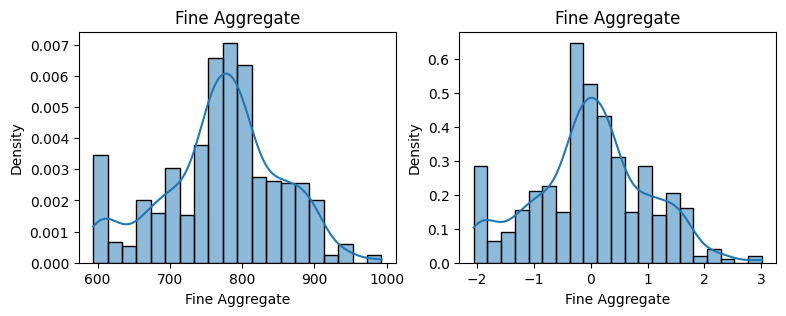

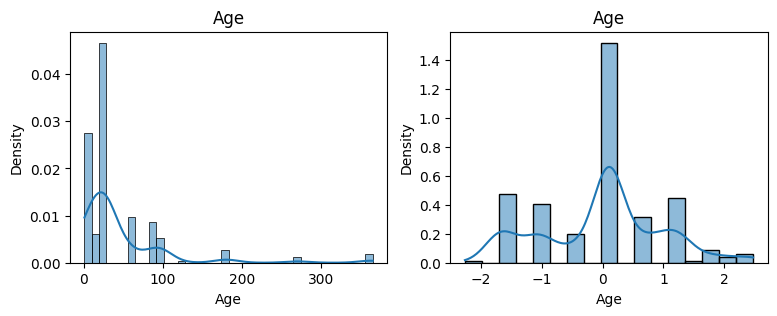

In [51]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)
# Before and after comparision for Yeo-Johnson
for col in X_train_transformed2.columns:
    plt.figure(figsize=(9,3))
    plt.subplot(121)
    sns.histplot(X_train[col],stat='density',kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col],stat='density',kde=True)
    plt.title(col)

    plt.show()

| Method           | Changes Distribution Shape? | Handles Skewness? |
| ---------------- | --------------------------- | ----------------- |
| StandardScaler   | ❌                           | ❌                 |
| MinMaxScaler     | ❌                           | ❌                 |
| RobustScaler     | ❌                           | ❌                 |
| PowerTransformer | ✅                           | ✅                 |
